In [69]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
df=pd.read_csv(r'C:\Users\DELL\Desktop\Notebook\KPMG.csv', parse_dates=True)
#df=pd.read_excel(r'C:\Users\DELL\Desktop\Notebook\KPMG_cust_demo.xlsx')
df1=pd.read_csv(r'C:\Users\DELL\Desktop\Notebook\KPMG_trx.csv')
df2=pd.read_csv(r'C:\Users\DELL\Desktop\Notebook\KPMG_customer_id.csv')

In [70]:
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,10/12/1953,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,12/16/1980,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1/20/1954,Recruiting Manager,Property,Mass Customer,N,1-Feb,Yes,15.0
3,4,Talbot,NaN,Male,33,10/3/1961,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,5/13/1977,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,8/9/1975,VP Product Management,Health,Mass Customer,N,-1.00E+02,No,19.0
3996,3997,Blanch,Nisuis,Female,87,7/13/2001,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,10/24/1973,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


<Axes: ylabel='Frequency'>

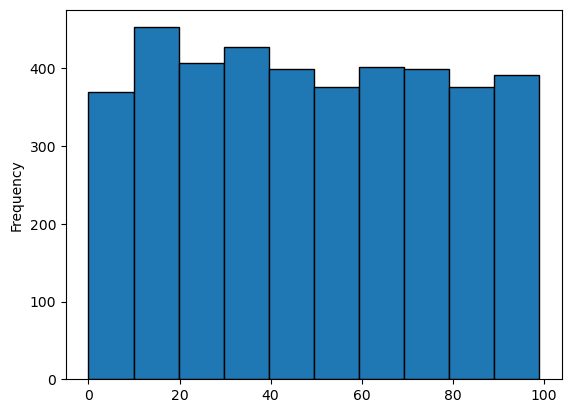

In [71]:
df['past_3_years_bike_related_purchases'].plot(kind='hist', edgecolor='black')

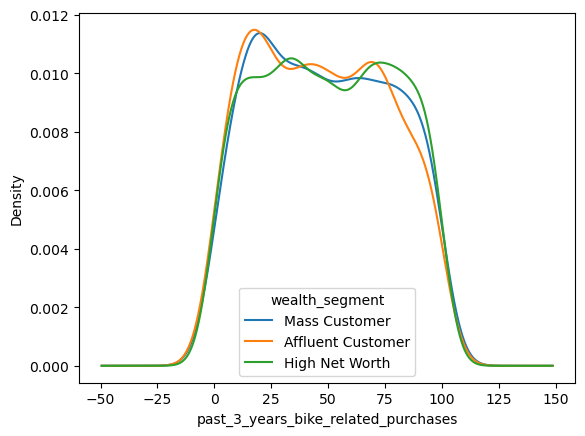

In [72]:
df.groupby('wealth_segment')['past_3_years_bike_related_purchases'].plot(kind='kde')
plt.xlabel('past_3_years_bike_related_purchases')
plt.legend(['Mass Customer','Affluent Customer','High Net Worth'],title='wealth_segment')

In [73]:
sum(df['DOB'].isnull())

87

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [75]:
#dropping default column since its not so usefull in this analysis
df.drop('default', axis=1, inplace=True)

In [76]:
#changing the data type of DOB column since it isn't consistent
df['DOB']=pd.to_datetime(df['DOB'])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [78]:
#converting a variable now  to datetime datatype
now=pd.to_datetime('now')
#getting age from DOB column
df['age']=(now-df['DOB']).astype('<m8[Y]')


C:\Users\DELL\AppData\Local\Temp\ipykernel_7760\1162625939.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  now=pd.to_datetime('now')


In [11]:
#func to convert age to age group
def age_range(age):
    x=age%10
    x_range=str.format('{0}-{1}', age-x,((age-x)+10))
    return x_range

In [12]:
#age group conversion
df['age_group']=df['age'].apply(age_range)

In [13]:
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69.0,60.0-70.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42.0,40.0-50.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69.0,60.0-70.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,61.0,60.0-70.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,46.0,40.0-50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0,47.0,40.0-50.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,21.0,20.0-30.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,No,NaN,NaN,nan-nan
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Yes,10.0,49.0,40.0-50.0


In [14]:
#replacing inconsistent values in gender columns
df['gender']=df['gender'].replace(['F', 'Femal'], 'Female')
df['gender']=df['gender'].replace(['M'], 'Male')
df['gender']=df['gender'].replace(['U'], 'Unidentified')

In [15]:
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69.0,60.0-70.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42.0,40.0-50.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69.0,60.0-70.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,61.0,60.0-70.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,46.0,40.0-50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0,47.0,40.0-50.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,21.0,20.0-30.0
3997,3998,Sarene,Woolley,Unidentified,60,NaT,Assistant Manager,IT,High Net Worth,N,No,NaN,NaN,nan-nan
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Yes,10.0,49.0,40.0-50.0


In [16]:
df['gender'].value_counts()

Female          2039
Male            1873
Unidentified      88
Name: gender, dtype: int64

In [17]:
df.drop('customer_id', axis=1, inplace=True)

In [18]:
df2.drop('postcode', axis=1, inplace=True)

In [19]:
df2.drop('address', axis=1, inplace=True)

In [20]:
df2.drop('customer_id', axis=1, inplace=True)

In [21]:
#df.drop('deceased_indicator', axis=1, inplace=True)

In [22]:
#joining cust_demo and cust_address dataframe
df_gen=pd.concat([df,df2], axis=1, join='inner')
df_gen

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group,state,country,property_valuation
0,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69.0,60.0-70.0,New South Wales,Australia,10
1,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42.0,40.0-50.0,New South Wales,Australia,10
2,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69.0,60.0-70.0,QLD,Australia,9
3,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,61.0,60.0-70.0,New South Wales,Australia,4
4,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,46.0,40.0-50.0,VIC,Australia,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14.0,47.0,40.0-50.0,VIC,Australia,3
3995,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0,47.0,40.0-50.0,QLD,Australia,6
3996,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,21.0,20.0-30.0,NSW,Australia,10
3997,Sarene,Woolley,Unidentified,60,NaT,Assistant Manager,IT,High Net Worth,N,No,NaN,NaN,nan-nan,QLD,Australia,7


In [23]:
#dropping null values
#df_gen.dropna(inplace=True)

In [24]:
#checking to be sure there are no null values
df_gen.isnull().sum()

first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  655
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
age                                     87
age_group                                0
state                                    0
country                                  0
property_valuation                       0
dtype: int64

In [25]:
#saving the data in csv
df_gen.to_csv('KPMG_clean1.csv', index=False)

In [26]:
df_gen

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group,state,country,property_valuation
0,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69.0,60.0-70.0,New South Wales,Australia,10
1,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42.0,40.0-50.0,New South Wales,Australia,10
2,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69.0,60.0-70.0,QLD,Australia,9
3,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,61.0,60.0-70.0,New South Wales,Australia,4
4,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,46.0,40.0-50.0,VIC,Australia,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14.0,47.0,40.0-50.0,VIC,Australia,3
3995,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0,47.0,40.0-50.0,QLD,Australia,6
3996,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,21.0,20.0-30.0,NSW,Australia,10
3997,Sarene,Woolley,Unidentified,60,NaT,Assistant Manager,IT,High Net Worth,N,No,NaN,NaN,nan-nan,QLD,Australia,7


In [27]:
df_gen['owns_car']=df['owns_car'].replace({'Yes':1, 'No':0})

In [28]:
df_gen

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group,state,country,property_valuation
0,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,1,11.0,69.0,60.0-70.0,New South Wales,Australia,10
1,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,1,16.0,42.0,40.0-50.0,New South Wales,Australia,10
2,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,1,15.0,69.0,60.0-70.0,QLD,Australia,9
3,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,0,7.0,61.0,60.0-70.0,New South Wales,Australia,4
4,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,1,8.0,46.0,40.0-50.0,VIC,Australia,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,1,14.0,47.0,40.0-50.0,VIC,Australia,3
3995,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,0,19.0,47.0,40.0-50.0,QLD,Australia,6
3996,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,1,1.0,21.0,20.0-30.0,NSW,Australia,10
3997,Sarene,Woolley,Unidentified,60,NaT,Assistant Manager,IT,High Net Worth,N,0,NaN,NaN,nan-nan,QLD,Australia,7


# New customer list data

In [59]:
new_cust=pd.read_csv(r'C:\Users\DELL\Desktop\Notebook\KPMG_new_cust_list1.csv')

In [60]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6.0,1.06,1.3250,1.65625,1.407812,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11.0,1.07,1.0700,1.33750,1.136875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5.0,0.88,0.8800,0.88000,0.880000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1.0,0.55,0.6875,0.68750,0.687500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9.0,0.78,0.7800,0.97500,0.975000,4,4,1.703125


In [61]:
new_cust.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis=1, inplace=True)

In [62]:
new_cust.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [63]:
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [79]:
new_cust['DOB']=pd.to_datetime(new_cust['DOB'])

In [80]:
#converting a variable now  to datetime datatype
now=pd.to_datetime('now')
#getting age from DOB column
new_cust['age']=(now-new_cust['DOB']).astype('<m8[Y]')


C:\Users\DELL\AppData\Local\Temp\ipykernel_7760\475605441.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  now=pd.to_datetime('now')


In [81]:
#func to convert age to age group
def age_range(age):
    x=age%10
    x_range=str.format('{0}-{1}', age-x,((age-x)+10))
    return x_range

In [82]:

#age group conversion
new_cust['age_group']=new_cust['age'].apply(age_range)
new_cust

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6.0,1,1.718750,65.0,60.0-70.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11.0,1,1.718750,53.0,50.0-60.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5.0,1,1.718750,48.0,40.0-50.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1.0,4,1.703125,44.0,40.0-50.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9.0,4,1.703125,57.0,50.0-60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7.0,996,0.374000,63.0,60.0-70.0
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10.0,997,0.357000,21.0,20.0-30.0
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2.0,997,0.357000,68.0,60.0-70.0
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2.0,997,0.357000,70.0,70.0-80.0


In [85]:
new_cust.drop(['address', 'postcode','country','DOB', 'last_name', 'first_name', 'deceased_indicator'], inplace=True, axis=1)

In [86]:
new_cust.isnull().sum()

gender                                   0
past_3_years_bike_related_purchases      0
job_title                              106
job_industry_category                  165
wealth_segment                           0
owns_car                                 0
tenure                                   0
state                                    0
property_valuation                       0
Rank                                     0
Value                                    0
age                                     17
age_group                                0
dtype: int64

In [87]:
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               1000 non-null   object 
 1   past_3_years_bike_related_purchases  1000 non-null   int64  
 2   job_title                            894 non-null    object 
 3   job_industry_category                835 non-null    object 
 4   wealth_segment                       1000 non-null   object 
 5   owns_car                             1000 non-null   object 
 6   tenure                               1000 non-null   int64  
 7   state                                1000 non-null   object 
 8   property_valuation                   1000 non-null   float64
 9   Rank                                 1000 non-null   int64  
 10  Value                                1000 non-null   float64
 11  age                            

In [88]:
new_cust.dropna()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,Rank,Value,age,age_group
0,Male,86,General Manager,Manufacturing,Mass Customer,Yes,14,QLD,6.0,1,1.718750,65.0,60.0-70.0
1,Male,69,Structural Engineer,Property,Mass Customer,No,16,NSW,11.0,1,1.718750,53.0,50.0-60.0
2,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,VIC,5.0,1,1.718750,48.0,40.0-50.0
3,Female,64,Account Representative III,Manufacturing,Affluent Customer,Yes,5,QLD,1.0,4,1.703125,44.0,40.0-50.0
4,Female,34,Financial Analyst,Financial Services,Affluent Customer,No,19,NSW,9.0,4,1.703125,57.0,50.0-60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Male,60,Paralegal,Financial Services,Affluent Customer,No,9,NSW,7.0,996,0.374000,63.0,60.0-70.0
996,Male,22,Senior Sales Associate,Health,Mass Customer,No,6,NSW,10.0,997,0.357000,21.0,20.0-30.0
997,Female,17,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,Yes,15,QLD,2.0,997,0.357000,68.0,60.0-70.0
998,Male,30,Financial Advisor,Financial Services,Mass Customer,Yes,19,QLD,2.0,997,0.357000,70.0,70.0-80.0


In [36]:
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,2,2950,2/25/2017,False,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,5/21/2017,True,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,10/16/2017,False,Approved,OHM Cycles,Standard,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,88,3135,8/31/2017,False,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,78,787,10/1/2017,True,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df1.isnull().sum()

transaction_id                 0
product_id                     0
customer_id                    0
transaction_date               0
online_order                 360
order_status                   0
brand                        197
product_line                 197
product_class                197
product_size                 197
list_price                     0
standard_cost                197
product_first_sold_date      197
Unnamed: 13                20000
Unnamed: 14                20000
Unnamed: 15                20000
Unnamed: 16                20000
Unnamed: 17                20000
Unnamed: 18                20000
Unnamed: 19                20000
Unnamed: 20                20000
Unnamed: 21                20000
Unnamed: 22                20000
Unnamed: 23                20000
Unnamed: 24                20000
Unnamed: 25                20000
dtype: int64

In [38]:
df1.drop(['Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'], inplace=True, axis=1)

In [39]:
df1['transaction_date']=pd.to_datetime(df1['transaction_date'])
df1['product_first_sold_date']=pd.to_datetime(df1['product_first_sold_date'], origin='1899-12-30', unit='D')

In [40]:
df1.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,2012-12-02
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,2014-03-03


In [41]:
#check the different categories od brand
df1['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [42]:
#fill null values with the most frequent brand
df1['brand'].replace(np.nan, 'Solex', inplace=True)

In [43]:

df1['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [44]:
#fill null values with the most frequent product line
df1['product_line'].replace(np.nan, 'Standard', inplace=True)

In [45]:
df1['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [46]:
#fill null values with the most frequent product size
df1['product_size'].replace(np.nan, 'medium', inplace=True)

In [47]:
df1['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [48]:
#fill null values with the most frequent product class
df1['product_class'].replace(np.nan, 'medium', inplace=True)

In [49]:
df1.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [50]:
df1['online_order'].value_counts()

True     9829
False    9811
Name: online_order, dtype: int64

In [51]:
df1.dropna(subset=['online_order'])

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,2012-12-02
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,2014-03-03
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,1999-07-20
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,1998-12-16
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,2015-08-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,"$1,203.40",2003-07-21
19996,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,$312.74,1997-05-10
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,$44.71,2010-08-20
19998,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,$136.73,2004-08-17


In [52]:
df1.dropna()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,2012-12-02
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,2014-03-03
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,1999-07-20
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,1998-12-16
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,2015-08-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,"$1,203.40",2003-07-21
19996,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,$312.74,1997-05-10
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,$44.71,2010-08-20
19998,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,$136.73,2004-08-17


In [53]:
#joining the data frames
joint_df=pd.concat([df_gen,df1], axis=1, join='inner')
joint_df

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,1,...,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,2012-12-02
1,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,1,...,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,2014-03-03
2,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,1,...,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,1999-07-20
3,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,0,...,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,1998-12-16
4,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,1,...,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,2015-08-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,1,...,2017-08-08,False,Approved,Trek Bicycles,Standard,medium,large,1469.44,$596.55,2012-05-18
3995,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,0,...,2017-10-13,True,Approved,WeareA2B,Touring,medium,large,1362.99,$57.74,1993-04-20
3996,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,1,...,2017-05-10,True,Approved,Giant Bicycles,Standard,high,small,1977.36,"$1,759.85",2011-08-24
3997,Sarene,Woolley,Unidentified,60,NaT,Assistant Manager,IT,High Net Worth,N,0,...,2017-11-23,True,Approved,Norco Bicycles,Standard,low,medium,363.01,$290.41,2005-05-10


In [54]:
#save data
joint_df.to_csv('kpmg_cleaned_data.csv')

In [55]:
new_cust.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [56]:
new_cust.drop(['last_name'], axis=1)

,first_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6.0,1,1.718750
1,Morly,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11.0,1,1.718750
2,Ardelis,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5.0,1,1.718750
3,Lucine,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1.0,4,1.703125
4,Melinda,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9.0,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7.0,996,0.374000
996,Burk,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10.0,997,0.357000
997,Melloney,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2.0,997,0.357000
998,Dickie,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2.0,997,0.357000


Model building, #DecisionTreeClassifier Model

In [ ]:
x_variable=tr[['Age']] #dataframe of a dataframe [[]]
y_variable=tr[['Survived']]
dtc=DecisionTreeClassifier() #decision tree classifier object
dtc.fit(x_variable, y_variable)

predicting values.... #testing our model with test data

In [89]:
#x_ts_variable=ts[['Age']]

NameError: name 'ts' is not defined

In [ ]:
predictor=dtc.predict(x_ts_variable)

In [ ]:
pd.DataFrame(predictor)